# Generación temáticas de noticias

## Importación de librerias

In [33]:

import pandas as pd
import sys
import json
import os
from openai import OpenAI
import os
from dotenv import load_dotenv
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import numpy as np

## Carga y selección de los datos

In [4]:
data = pd.read_csv('../data/csv/df_contenidos.csv', encoding='utf-8')# Leemos el arcivos CSV con nuestro df_contenidos

In [31]:
data

,id_contenido,titulo,texto
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T..."
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...
...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene..."


In [ ]:
# cargamos las variables del archivo .env
load_dotenv()



# iniciamos el cliente de OpenAI con la clave Api que tenemos en el archivo .env
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

# Definimos una funcion que nos lea el texto de la noticia y que nos devuelva la tematica
def obtener_tematica(texto):
    try:
        response = client.chat.completions.create(
            model="gpt-4o-mini",  
            messages=[
                {"role": "system", "content": "Eres un modelo que clasifica textos en temáticas."},
                {"role": "user", "content": f"¿Cuál es la temática de este texto?: '{texto}'. Elige la tematica entre las siguientes opciones: 'Ciencia', 'Tecnología', 'Salud', 'Educación', 'Deportes', 'Arte', 'Historia', 'Economía', 'Política', 'Sociedad'. Si no puedes clasificarlo, responde con 'No clasificado'.Devuelve únicamente la temática, **solo una palabra** y sin explicaciones, sin comillas, sin puntos."}
            ],
            temperature=0
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print("Error:", e)
        return None

# aplicamos la funcion a cada fila del dataframe
data['tematica'] = data['texto'].apply(lambda x: obtener_tematica(x))

print(data)

      id_contenido                                             titulo  \
0             8476                       You Can Smell Hillary’s Fear   
1            10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2             3608        Kerry to go to Paris in gesture of sympathy   
3            10142  Bernie supporters on Twitter erupt in anger ag...   
4              875   The Battle of New York: Why This Primary Matters   
...            ...                                                ...   
6330          4490  State Department says it can't find emails fro...   
6331          8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332          8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333          4021  In Ethiopia, Obama seeks progress on peace, se...   
6334          4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                  texto  tematica  
0     Daniel Greenfield, a Shillman Journalism Fello...

In [35]:
data['tematica'].value_counts()

tematica
Política          4828
Sociedad           582
Salud              222
Economía           213
Tecnología         113
No clasificado     100
Historia            99
Ciencia             87
Educación           44
Deportes            23
Arte                23
Religión             1
Name: count, dtype: int64

Ahora exportamos en CSV el dataframe con la nueva columna de temáticas.

In [ ]:
# data.to_csv('../data/csv/df_contenidos_limpios.csv', index=False, encoding='utf-8')

In [3]:
df = pd.read_csv('../data/csv/df_contenidos_limpios.csv', encoding='utf-8')# Leemos el arcivos CSV con nuestro df_contenidos

## Evaluación de Resultados

Para calcular el "Accuracy" del modelo, vamos a seleccionar una muestra representativa de los datos para comprobar manualmente si las noticias están bien clasificadas.

In [ ]:
# Agrupamos las tematicas por porcentaje de noticias clasificadas.

tematicas = df.groupby('tematica')['id_contenido'].count().reset_index(name='num_noticias').sort_values(by='num_noticias', ascending = False)
tematicas['porcentaje_noticias'] = round( tematicas['num_noticias'] / (tematicas['num_noticias'].sum()) *100,2) 

In [6]:
tematicas

,tematica,num_noticias,porcentaje_noticias
7,Política,4828,76.21
10,Sociedad,582,9.19
9,Salud,222,3.50
3,Economía,213,3.36
11,Tecnología,113,1.78
6,No clasificado,100,1.58
5,Historia,99,1.56
1,Ciencia,87,1.37
4,Educación,44,0.69
0,Arte,23,0.36


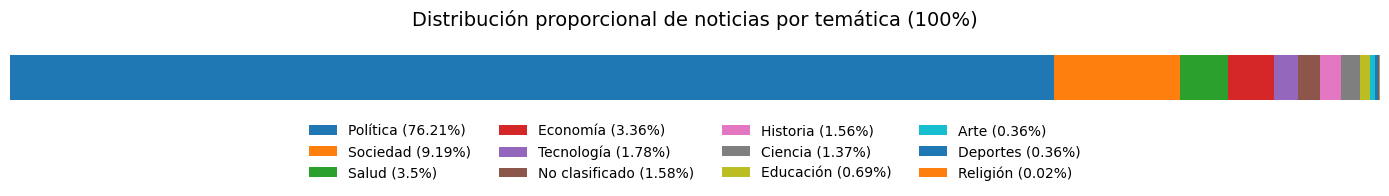

In [27]:
fig, ax = plt.subplots(figsize=(14, 2))
left = 0
bars = []

for i, row in tematicas.iterrows():
    width = row['porcentaje_noticias'] / 100
    bar = ax.barh(0, width, left=left, label=f"{row['tematica']} ({row['porcentaje_noticias']}%)")
    bars.append(bar)
    left += width

ax.set_xlim(0, 1)
ax.axis('off')
ax.set_title("Distribución proporcional de noticias por temática (100%)", fontsize=14, pad=20)

ax.legend(ncol=4, bbox_to_anchor=(0.5, -0.2), loc='upper center', frameon=False)
plt.subplots_adjust(bottom=0.8)

plt.tight_layout()
plt.show()

In [ ]:
np.random.seed(5) # Establecemos la semilla para la aleatoriedad

# Seleccionamos una muestra aleatoria representativa de la distribución de cada tematica 

df_politica = df[df['tematica']=='Política'].sample(10)

df_sociedad = df[df['tematica']=='Sociedad'].sample(9)

df_salud = df[df['tematica']=='Salud'].sample(3)

df_economia = df[df['tematica']=='Economía'].sample(3)

df_tecnologia = df[df['tematica']=='Tecnología'].sample(2)

df_no_clasificado = df[df['tematica']=='No clasificado'].sample(1)

df_Historia = df[df['tematica']=='Historia'].sample(1)

df_ciencia = df[df['tematica']=='Ciencia'].sample(1)

df_educacion = df[df['tematica']=='Educación'].sample(1)

df_arte = df[df['tematica']=='Arte'].sample(1)

df_deportes = df[df['tematica']=='Deportes'].sample(1)

df_religion = df[df['tematica']=='Religión'].sample(1)


In [ ]:
df_politica #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_politica['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------')
    print(x)
    contador += 1

# la noticia 2695 habla sobre la censura en un foro de reddit, por lo que no es una noticia de política.



-----------------Noticia numero 1------------------------------------------------------------------------
Obama Furious After Fed-Up ‘Deplorables’ Drop 41,000-Piece Gift On Him   Amanda Shea   Pissed off Patriots (left), Barack Obama deplaning Air Force One (right) 
Barack Obama was at home in the White House when he received a little “gift” from Donald Trump’s fed-up “deplorables,” who interrupted his taxpayer-funded rest and relaxation with 41,000 things he never saw coming. These blunt patriots weren’t messing around, and they sent a clear message to our lame duck president, who didn’t like it at all. 
The leader of the free world hasn’t done much in his two terms of trying, and he’s not about to start now on his way out of office. He has taken the liberty of awarding himself substantial tee time, only reserving his efforts and energy to promote who he hopes to be his successor, Hillary Clinton. As annoying at it is to watch him do nothing, it’s worse to see him take a side to cam

In [ ]:
df_sociedad #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_sociedad['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1

    # sociedad sucesos



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Convicted Boston Marathon bomber Dzhokhar Tsarnaev’s mother, Zubeidat, has reportedly posted a statement online declaring Americans “the terrorists here” and calling her son “the best of the best.” In a message sent to a family friend on Russian social media site VKontakte, Zubeidat Tsarnaev wrote, “I will never forget it. May god bless those who helped my son. The terrorists here are the Americans and it’s known to everyone. My son is the best of the best.” Dzhokhar Tsarnaev was found guilty on all 30 counts against him and now faces the death penalty.

Zubeidat said she was outraged at the verdict in an interview with Vocativ over WhatsApp:

"TODAY THEY ARE KILLING MUSLIMS, AND TOMORROW WILL COME YOUR TURN AND HE, WHO DOUBTS THIS IS DEEPLY MISTAKEN!!!!!” . "THEY WILL PAY FOR MY SONS AND THE SONS OF ISLAM, PERMANENTLY!!! THE TEARS OF THEIR MOTHERS WILL BE FUEL F

In [ ]:
df_salud #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_salud['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1

    # sociedad sucesos



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Owned by Unilever, the Axe brand includes a range of men’s grooming products with many of the ingredients never even tested for safety according to the C.I.R. – Cosmetic Ingredient Review. Endocrine Disrupting Chemicals 
Axe products are loaded with endocrine disrupting chemicals. Endocrine disruptorsare exogenous, synthetic chemicals that have hormone-like effects on both humans and wild-life and interfere with the endocrine system by either mimicking or blocking our natural hormones and disrupting their respective body functions. Member scientists of the Endocrine Society issued a report in which they claim: 
“We present the evidence that endocrine disruptors have effects on male and female reproduction, breast development and cancer, prostrate cancer, neuroendocrinology, thyroid, metabolism and obesity, and cardiovascular endocrinology.” 
New studies are also 

In [ ]:
df_economia #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_economia['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1

   



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
11 Views November 13, 2016 GOLD , KWN King World News 
On the heels of a remarkable week where the world witnessed the greatest political upset in history and subsequent chaos in global markets, today King World News is pleased to present an extremely important update on the war in the gold market from Michael Oliver at MSA. Oliver allowed KWN exclusively to share this key report with our global audience after last week’s takedown in the gold market. 
By Michael Oliver, MSA (Momentum Structural Analysis) November 13 ( King World New s) – Gold: If one seeks to capture large trends, then measure large… If one does not have a long-term map to watch as the trend unfolds, then it’s all too easy to run when some bullets fly. And they always fly… Continue reading the Michael Oliver piece below… Advertisement To hear which company investors & institutions around the glob

In [ ]:
df_tecnologia #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_tecnologia['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
source Add To The Conversation Using Facebook Comments


-----------------Noticia numero 2-----------------------------------------------------------------------------------------
By Christina Sarich
Jordan — You’ve already heard of solar panels that can sustainably provide energy, but what about an ultra-high tech solar panel that can provide doubly-pure, twice distilled water for a family of four, out of thin air?
A new start up company called Zero Mass Water that won’t rely on outdated municipal water with decaying pipes full of lead to deliver water to the ‘middle billion’ and under-served people lacking clean drinking water in the world. It will create it with solar panels and a technology that capitalizes on moisture in the air.
The company’s tag line is ‘drinking water democratized,’ and it certainly seems to stand for the exact opposite world view of, say

In [ ]:
df_no_clasificado #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_no_clasificado['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Are you shitting me !! A dindu flavor 24 - 'Jack Bauer?? ..PASS!!! 01/31/07 5 01/12/09 11 Mail with questions or comments about this site. "Godlike Productions" & "GLP" are registered trademarks of Zero Point Ltd. Godlike™ Website Design Copyright © 1999 - 2015 Godlikeproductions.com Page generated in 0.006s (8 queries)


In [64]:
df_no_clasificado

,id_contenido,titulo,texto,tematica
5205,9460,Are you shitting me !! A dindu flavor 24 - 'Ja...,Are you shitting me !! A dindu flavor 24 - 'Ja...,No clasificado


In [ ]:
df_Historia #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_Historia['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
October 26, 2016 Knesset Speaker asks Vatican to join battle against UNESCO’s denial of history 
The resolution, the Speaker wrote, “is an assault on history and is deeply offensive to both Christianity and Judaism. The denial of the historicity of the two Jerusalem Temples and the Temple Mount as recounted in both the Old and New Testaments is a terrible indictment of the international community when repeatedly adopted by an important UN body. 
“The outrageous repudiation of the millennia-old bond between Judaism and its holiest shrines in Jerusalem is a blatant attempt to rewrite history,” he added. “The annals of both our religions cannot be erased by raised hands and counted votes.” 
Edelstein said the time has come for the international community to pass a resolution reaffirming Jerusalem as the holy city for the three major monotheistic religions, “a city w

In [ ]:
df_ciencia #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_ciencia['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
geoengineeringwatch.org 
Global climate engineering programs are mathematically the single greatest assault against nature ever launched by the human race. Incredibly, the majority of global populations still remain oblivious to the ongoing blatant climate engineering atrocities occurring overhead day after day. This willful blindness of the masses is largely due to the total betrayal of the truth by the vast majority of the science community and all of mainstream media , both of whom are heavily invested in covering up the crimes of their paymasters. How badly damaged is our once thriving biosphere? We are past the point of no return in regard to the once thriving planet we have known. Below is a quote from a powerful and moving recent article by Dr. Glen Barry which accurately outlines the reality we collectively face. 
Miraculous nature is being murdered. Ever

In [ ]:
df_educacion #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_educacion['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Preventing cultural genocide with the Mother Tongue policy in Eritrea By Thomas C. Mountain Posted on October 27, 2016 by Thomas C. Mountain 
The small east African nation of Eritrea has implemented the Mother Tongue policy nationwide to prevent cultural genocide within its nine different ethnic groups. 
This is done by educating all children in tribal environments in their mother tongue until literacy at grade 5. By making sure that the ethnic minorities learn to read and write in their mother tongue the Eritrean Government is making sure that their culture survives as well, for without one’s language one cannot practice your culture. 
Historically destroying peoples mother tongue is the means used to carry out a policy of cultural genocide with many thousands of dialects having disappeared during the Western colonial and neo colonial era. Today many of the lang

In [ ]:
df_arte #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_arte['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Next Swipe left/right Make music great again, with these 10 Trumped up album covers We’ve previously seen how the addition of Donald Trump can ruin perfectly good films , now the tiny-handed man baby ruins 10 albums.
1. 
— Suzanne McCusker (@SuzMcC72) November 2, 2016 
2. https://twitter.com/Okeating/status/793820751782633472


In [ ]:
df_deportes #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_deportes['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Chicago Cubs first baseman Anthony Rizzo stepped up to the microphone during the World Series rally in Grant Park and choked up, as he spoke about what it meant to be able to be on a team with the 38-year-old catcher David Ross, who was a mentor to him. Rizzo, Ross, and center fielder Dexter Fowler stood shoulder-to-shoulder singing that silly jingle, the one that goes, “Go Cubs Go! Go Cubs Go! Hey, Chicago, whaddya say? Cubs are gonna win today.” It all really hit home for me as a Cubs fan.
Life is full of things that bring us joy but carry unsavory aspects to them. The Cubs team is owned by Tom Ricketts, a man who donated $1 million to Donald Trump and bears a frightening resemblance to Ted Cruz; so much that one might think Ricketts was his brother. The Cubs also signed Aroldis Chapman, a closer, who served a 30-game suspension this year for domestic abuse. Cu

In [ ]:
df_religion #  Mostramos las noticias de la tematica seleccionada.

contador = 1
for x in df_religion['texto']:
    print('\n')
    print(f'-----------------Noticia numero {contador}-----------------------------------------------------------------------------------------')
    print(x)
    contador += 1



-----------------Noticia numero 1-----------------------------------------------------------------------------------------
Protestants get ready to grovel By Gilad Atzmon Posted on November 9, 2016 by Gilad Atzmon 
This week we learned that Jewish institutions insist upon the Protestant Church apologising for its founder’s views of the Jews. The Jewish Algemeiner writes that “the 500th anniversary of the Reformation would be the ‘perfect time’ for Protestant leaders to recognise and apologise for the ‘horrific antisemitism’ of their movement’s founder, Martin Luther.” 
The truth of the matter is that Martin Luther didn’t know about Zionism, Israeli criminality, Alan Dershowitz, Bernie Madoff, Jeffrey Epstein, or Sir Philip Green but he still had a serious problem with the Jews. Back in 1543 he wrote On The Jews and their Lies , a book notorious for its opposition to Jews and their religion. 
Rabbi Abraham Cooper—associate dean of the Simon Wiesenthal Centre—wants the Protestants to d